In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

#### Computing a convex hull of a set of points:

In [2]:
def plot_hull(points):
    hull = ConvexHull(points)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))
    for ax in (ax1, ax2):
        ax.plot(points[:, 0], points[:, 1], '.', color='k')
        if ax == ax1:
            ax.set_title('Points')
        else:
            ax.set_title('Convex hull')
            for simplex in hull.simplices:
                ax.plot(points[simplex, 0], points[simplex, 1], 'c')
            ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='r', color='none', lw=1, markersize=10)
        ax.set_xticks(range(10))
        ax.set_yticks(range(10))
    plt.show()
    return hull




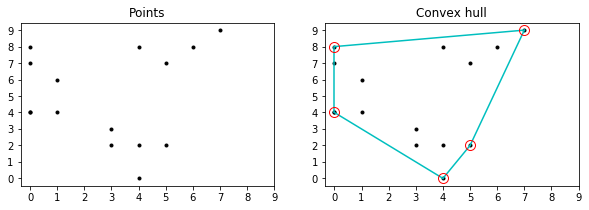

In [3]:
points = np.random.randint(0, 10, size=(15, 2))  # Random points in 2-D
plot_hull(points)

#### Scaling the convex hull:

In [4]:
def scale_hull(points, m): #Add defenses
    scaled_points = m*points
    return plot_hull(scaled_points)

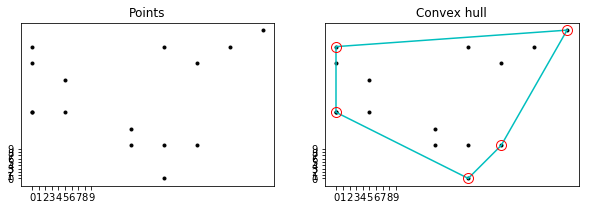

In [6]:
m = 5
scale_hull(points, m)

#### Counting interior points

In [7]:
#TO DO -- import polytope as pc - use pip or import from source
import polytope as pc

`polytope` failed to import `cvxopt.glpk`.
will use `scipy.optimize.linprog`


Check linearity for aymptotic Riemann Roch formula

In [ ]:
#Take m_1 < m_2, as powers of anticanonical bundle for which we check ampleness
def is_very_ample(m_1, h_1, m_2, h_2, m_3, h_3 K):
    #compute gradient of points one and two
    y_1, y_2, y_3 = h_1 - (m_1**2)*((k**2)/2),h_2 - (m_2**2)*((k**2)/2), h_3-(m_3**2)*((k**2)/2)
    grad_1 =(y_2 - y_1)/(m_2 - m_1)
    grad_2 = (y_3 -y_2)/(m_3 - m_2)
    if grad_1 == grad_2:
        return True
    else:
        return False
    

def get_ample_index(vertices, antican_sq_deg):
    very_ample = False
    m = 0
    while very_ample == False:
        m += 1
        h_1 = polytope_lattice_points(m*vertices)
        h_2 = polytope_lattice_points((m+1)*vertices)
        h_3 = polytope_lattice_points((m+2)*vertices)
        very_ample = is_very_ample(m, h_1, m+1, h_2, m+2, h_3)
    return m






